In [143]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [144]:
infonce_pkl_path = "/BS/dduka/work/projects/TempNet/Bimodal_CL/visualizations/temperature_assignments_values/infonce/cc3m_temperature_assignments.pkl"
temo_temo_path = "/BS/dduka/work/projects/TempNet/Bimodal_CL/visualizations/temperature_assignments_values/temo/cc3m_temperature_assignments.pkl"

In [145]:
with open(infonce_pkl_path, "rb") as f:
    infonce_data = pickle.load(f)

with open(temo_temo_path, "rb") as f:
    temo_data = pickle.load(f)

In [169]:
NR_BINS = 100

Intersection threshold: 0.1729
False Negatives (positive < intersection_point): 450 / 13358
False Positives (negative > intersection_point): 5487417 / 178422806


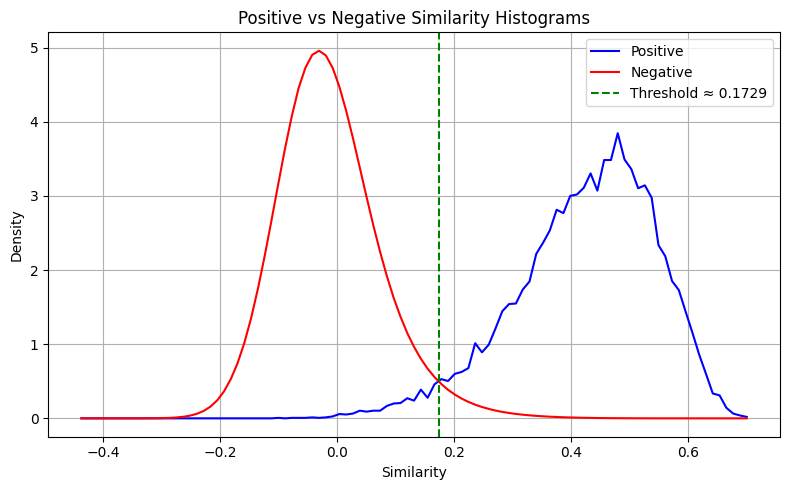

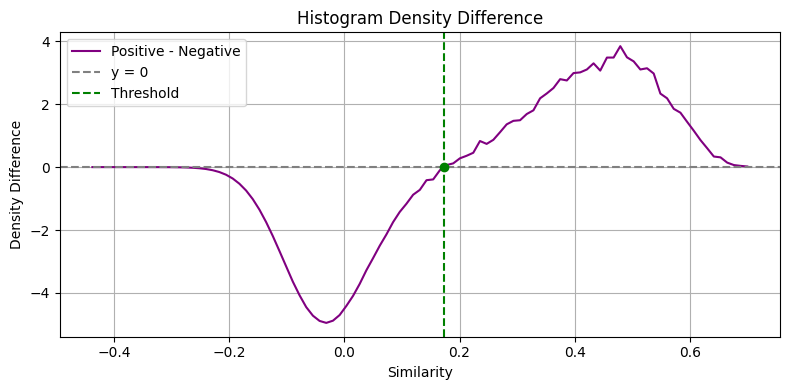

In [199]:
import numpy as np
import matplotlib.pyplot as plt

positive = temo_data["i2t_similarity_matrix_positive_pairs"].cpu().numpy()
negative = temo_data["i2t_similarity_matrix_negative_pairs"].cpu().numpy()

POS_LENGTH = len(positive)
NEG_LENGTH = len(negative)

all_data = np.concatenate([positive, negative])
bins = np.linspace(all_data.min(), all_data.max(), NR_BINS)

p_counts, _ = np.histogram(positive, bins=bins, density=True)
n_counts, _ = np.histogram(negative, bins=bins, density=True)
bin_centers = (bins[:-1] + bins[1:] ) / 2

diff = p_counts - n_counts
sign_changes = np.where(np.diff(np.sign(diff)))[0]

if len(sign_changes) > 0:
    idx = sign_changes[0]
    x0, x1 = bin_centers[idx], bin_centers[idx + 1]
    y0, y1 = diff[idx], diff[idx + 1]
    intersection_point = x0 - y0 * (x1 - x0) / (y1 - y0)
    print(f"Intersection threshold: {intersection_point:.4f}")
else:
    print("No intersection point found.")

if intersection_point is not None:
    temo_false_negatives = np.sum(positive < intersection_point)
    temo_false_positives = np.sum(negative > intersection_point)

    print(f"False Negatives (positive < intersection_point): {temo_false_negatives} / {len(positive)}")
    print(f"False Positives (negative > intersection_point): {temo_false_positives} / {len(negative)}")

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, p_counts, label="Positive", color="blue")
plt.plot(bin_centers, n_counts, label="Negative", color="red")
if intersection_point is not None:
    plt.axvline(intersection_point, color="green", linestyle="--", label=f"Threshold ≈ {intersection_point:.4f}")
plt.title("Positive vs Negative Similarity Histograms")
plt.xlabel("Similarity")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Difference Plot ===
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, label="Positive - Negative", color="purple")
plt.axhline(0, color="gray", linestyle="--", label="y = 0")
if intersection_point is not None:
    plt.axvline(intersection_point, color="green", linestyle="--", label="Threshold")
    plt.scatter(intersection_point, 0, color="green", zorder=5)
plt.title("Histogram Density Difference")
plt.xlabel("Similarity")
plt.ylabel("Density Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Intersection threshold: 0.3344
False Negatives (positive < intersection_point): 558 / 13358
False Positives (negative > intersection_point): 5363309 / 178422806


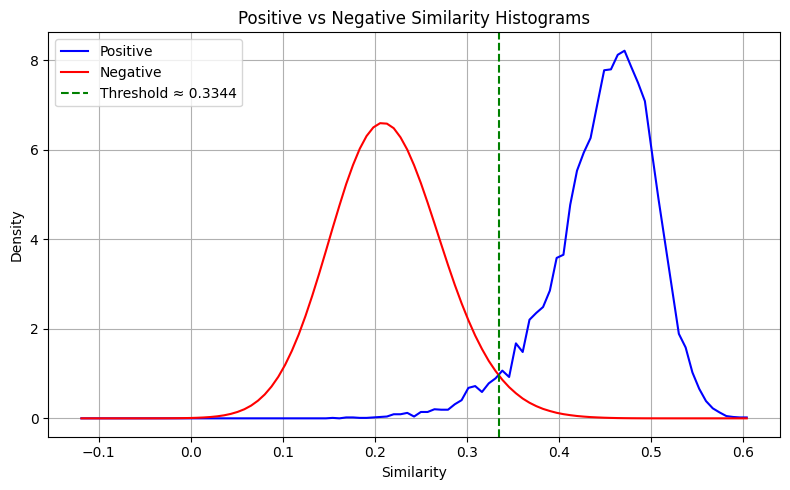

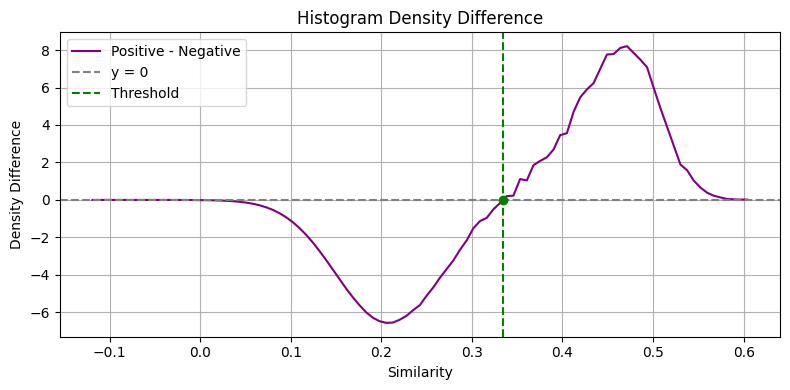

In [200]:
import numpy as np
import matplotlib.pyplot as plt

positive = infonce_data["i2t_similarity_matrix_positive_pairs"].cpu().numpy()
negative = infonce_data["i2t_similarity_matrix_negative_pairs"].cpu().numpy()

all_data = np.concatenate([positive, negative])
bins = np.linspace(all_data.min(), all_data.max(), NR_BINS)

p_counts, _ = np.histogram(positive, bins=bins, density=True)
n_counts, _ = np.histogram(negative, bins=bins, density=True)
bin_centers = (bins[:-1] + bins[1:] ) / 2

diff = p_counts - n_counts
sign_changes = np.where(np.diff(np.sign(diff)))[0]

if len(sign_changes) > 0:
    idx = sign_changes[0]
    x0, x1 = bin_centers[idx], bin_centers[idx + 1]
    y0, y1 = diff[idx], diff[idx + 1]
    intersection_point = x0 - y0 * (x1 - x0) / (y1 - y0)
    print(f"Intersection threshold: {intersection_point:.4f}")
else:
    print("No intersection point found.")

if intersection_point is not None:
    infonce_false_negatives = np.sum(positive < intersection_point)
    infonce_false_positives = np.sum(negative > intersection_point)

    print(f"False Negatives (positive < intersection_point): {infonce_false_negatives} / {len(positive)}")
    print(f"False Positives (negative > intersection_point): {infonce_false_positives} / {len(negative)}")

plt.figure(figsize=(8, 5))
plt.plot(bin_centers, p_counts, label="Positive", color="blue")
plt.plot(bin_centers, n_counts, label="Negative", color="red")
if intersection_point is not None:
    plt.axvline(intersection_point, color="green", linestyle="--", label=f"Threshold ≈ {intersection_point:.4f}")
plt.title("Positive vs Negative Similarity Histograms")
plt.xlabel("Similarity")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot 2: Difference Plot ===
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, label="Positive - Negative", color="purple")
plt.axhline(0, color="gray", linestyle="--", label="y = 0")
if intersection_point is not None:
    plt.axvline(intersection_point, color="green", linestyle="--", label="Threshold")
    plt.scatter(intersection_point, 0, color="green", zorder=5)
plt.title("Histogram Density Difference")
plt.xlabel("Similarity")
plt.ylabel("Density Difference")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [201]:
print("Statistics")

print(f"False positives for TeMo: {100 * (temo_false_positives / NEG_LENGTH):.2f}%")
print(f"False positives for InfoNCE: {100 * (infonce_false_positives / NEG_LENGTH):.2f}%")

print("\n")

print(f"False negatives for TeMo: {100 * (temo_false_negatives / POS_LENGTH):.2f}%")
print(f"False negatives for InfoNCE: {100 * (infonce_false_negatives / POS_LENGTH):.2f}%")

Statistics
False positives for TeMo: 3.08%
False positives for InfoNCE: 3.01%


False negatives for TeMo: 3.37%
False negatives for InfoNCE: 4.18%
